In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.forecasting.compose import make_reduction
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanSquaredError
from sktime.utils.plotting import plot_series
from xgboost import XGBRegressor



In [3]:
df = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/datasets/monthly-milk-production-pounds-p.csv", index_col=0)
idx = pd.to_datetime( df.index ).to_period("M")
df.index = idx



17.746294448888946


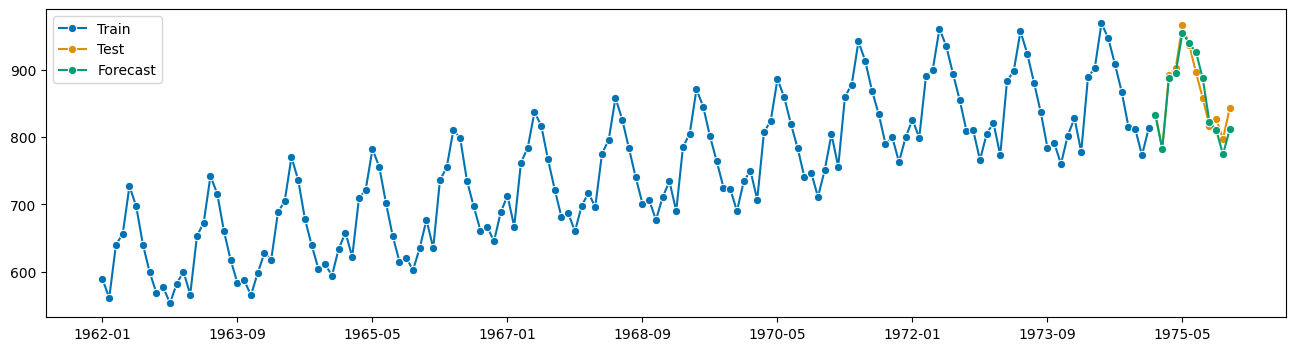

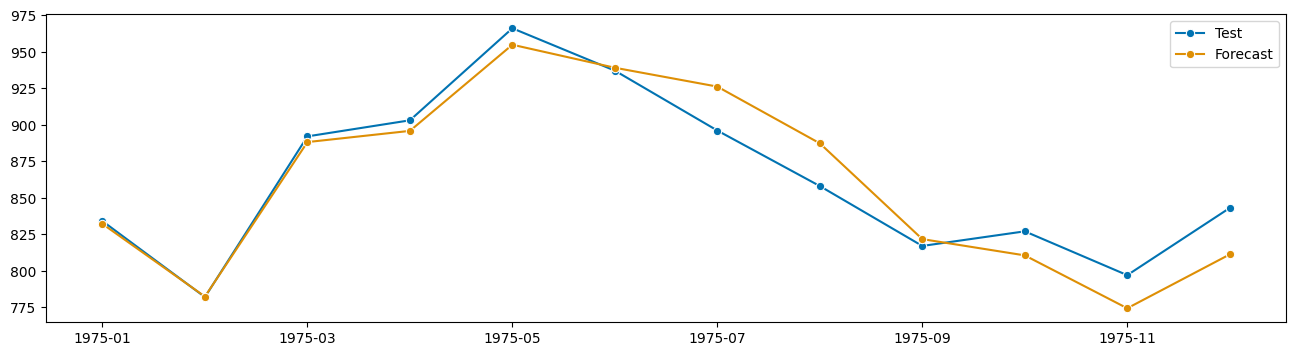

In [4]:
y_train, y_test = temporal_train_test_split(df,test_size=12)
fh = np.arange(1, len(y_test) + 1)

regressor = RandomForestRegressor(random_state=23)

forecaster = make_reduction(regressor, window_length=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
rmse = MeanSquaredError(square_root=True)
print(rmse(y_test, y_pred))

plot_series(y_train,y_test,y_pred , labels=['Train','Test','Forecast'])
plt.show()

plot_series(y_test,y_pred , labels=['Test','Forecast'])
plt.show()



{'window_length': 7}
0.022634142881256748


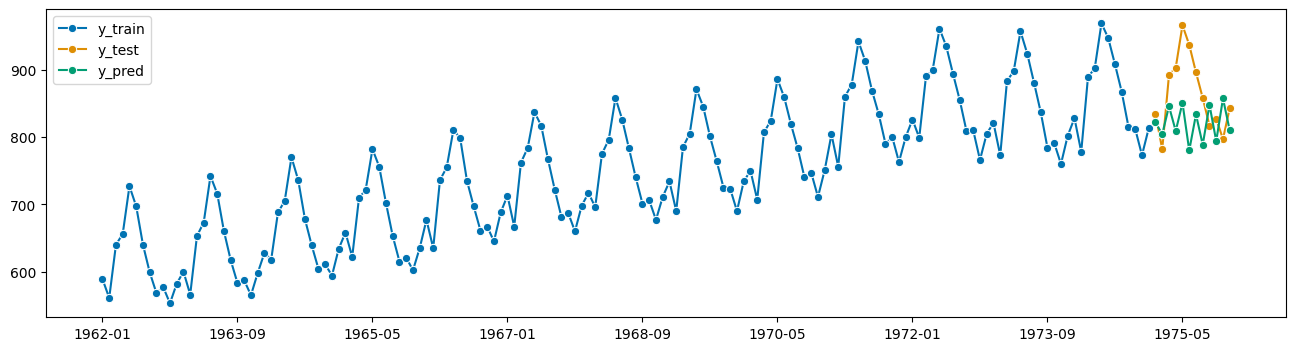

73.62316596815168


In [11]:
"""## **Basic Grid Search CV**"""

from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import ForecastingGridSearchCV,SlidingWindowSplitter
forecaster = make_reduction(regressor, window_length=10, strategy="recursive")
param_grid = {"window_length": [7,10, 12, 15]}

"""We fit the forecaster on an initial window which is 80% of the historical data then use temporal sliding window cross-validation to find the optimal hyper-parameters """

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.9), window_length=20)
gscv = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=param_grid)
gscv.fit(y_train)

print(gscv.best_params_)
print(gscv.best_score_)

y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

print(rmse(y_test, y_pred))


{'estimator__max_features': 6, 'window_length': 7}
0.02338393572281707
80.39071339402332


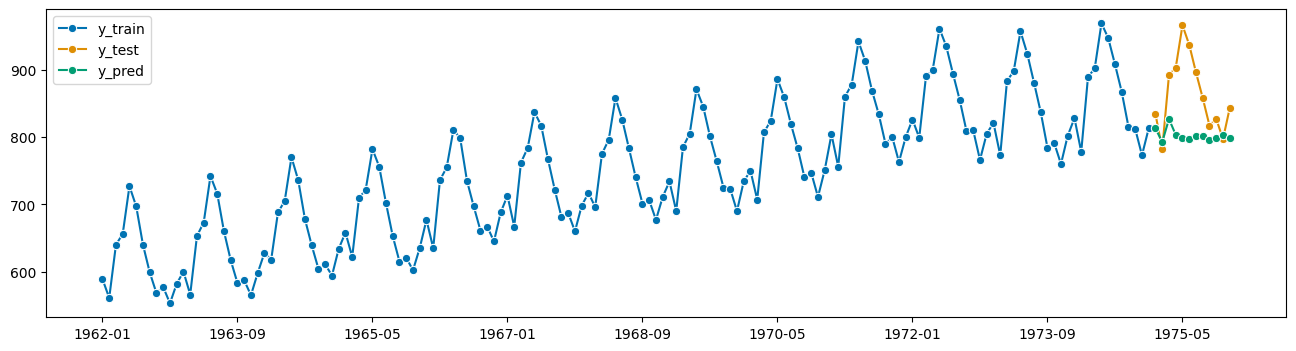

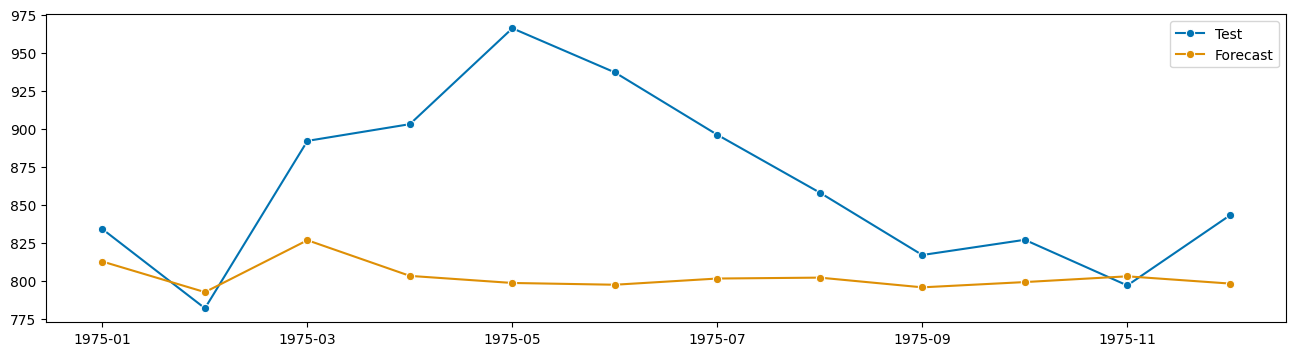

In [7]:
"""### **Composite Grid Search C**V"""

forecaster.get_params()

forecaster = make_reduction(regressor, window_length=10, strategy="recursive")
param_grid = {"window_length": [7, 10, 12, 15],
              'estimator__max_features':[3,4,6,7]}
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.9), window_length=20)
gscv = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=param_grid)

gscv.fit(y_train)

print(gscv.best_params_)
print(gscv.best_score_)

print(rmse(y_test, y_pred))

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

plot_series(y_test,y_pred , labels=['Test','Forecast'])
plt.show()

# XGBoost

20.20197932049059


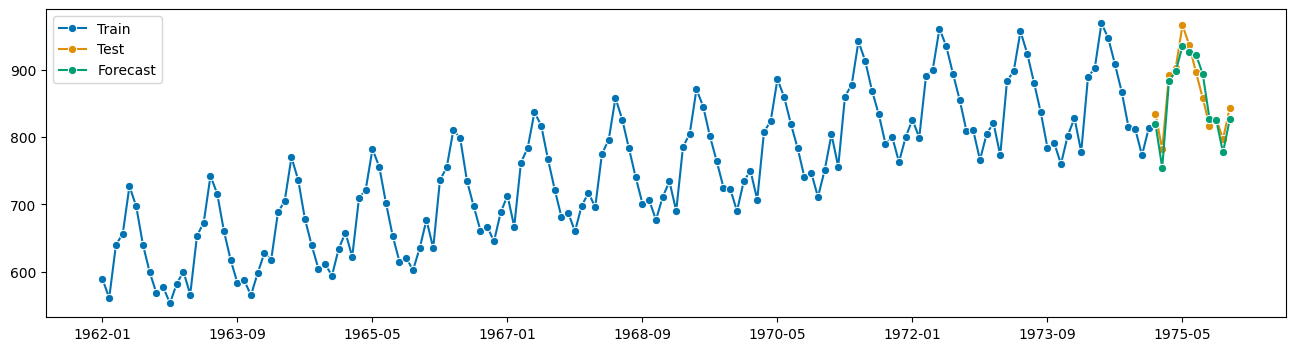

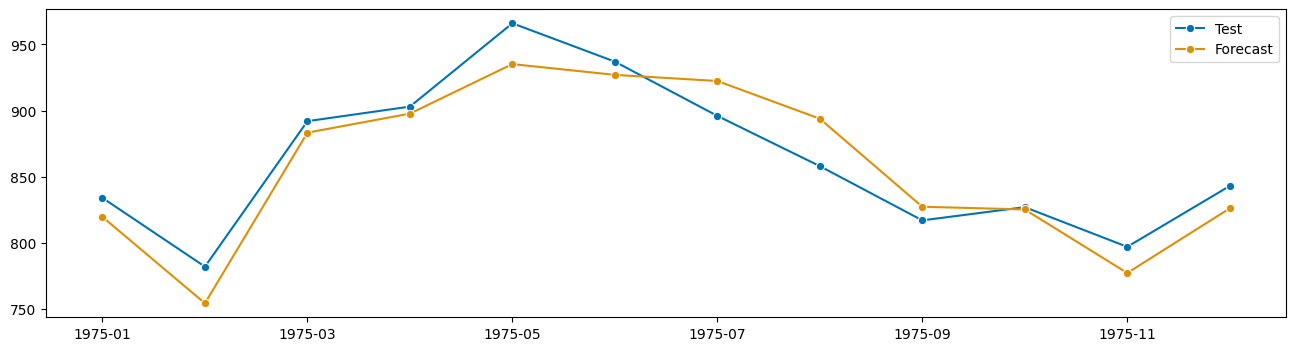

In [10]:
y_train, y_test = temporal_train_test_split(df,test_size=12)
fh = np.arange(1, len(y_test) + 1)

regressor = XGBRegressor(random_state=23)

forecaster = make_reduction(regressor, window_length=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
rmse = MeanSquaredError(square_root=True)
print(rmse(y_test, y_pred))

plot_series(y_train,y_test,y_pred , labels=['Train','Test','Forecast'])
plt.show()

plot_series(y_test,y_pred , labels=['Test','Forecast'])
plt.show()



{'window_length': 7}
0.022634142881256748


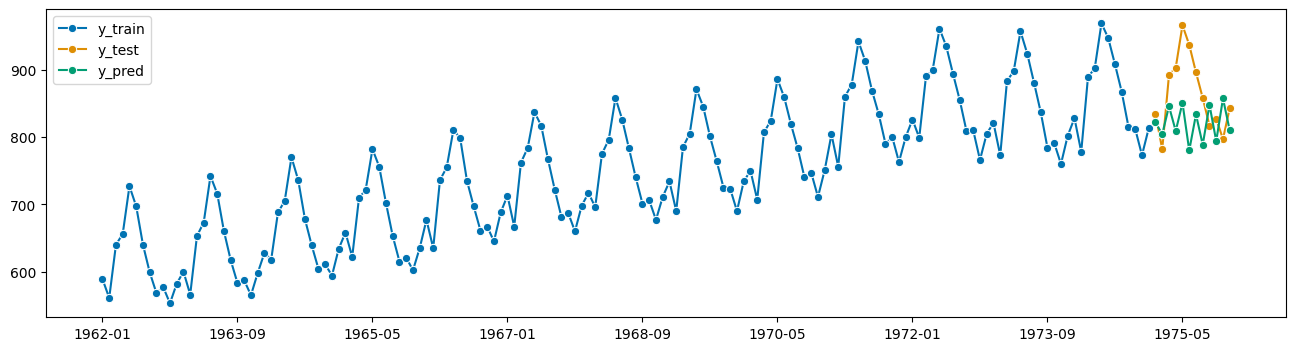

73.62316596815168


In [12]:
"""## **Basic Grid Search CV**"""

from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import ForecastingGridSearchCV,SlidingWindowSplitter
forecaster = make_reduction(regressor, window_length=10, strategy="recursive")
param_grid = {"window_length": [7,10, 12, 15]}

"""We fit the forecaster on an initial window which is 80% of the historical data then use temporal sliding window cross-validation to find the optimal hyper-parameters """

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.9), window_length=20)
gscv = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=param_grid)
gscv.fit(y_train)

print(gscv.best_params_)
print(gscv.best_score_)

y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

print(rmse(y_test, y_pred))


[20:47:11] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:11] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:11] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:11] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:11] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:12] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:12] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:12] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:12] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:12] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:12] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:12]

[20:47:15] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:16] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:16]

[20:47:19] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:19] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:19] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:19] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:20] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:20] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:20] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:20] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:20] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:20] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:20] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[20:47:20]

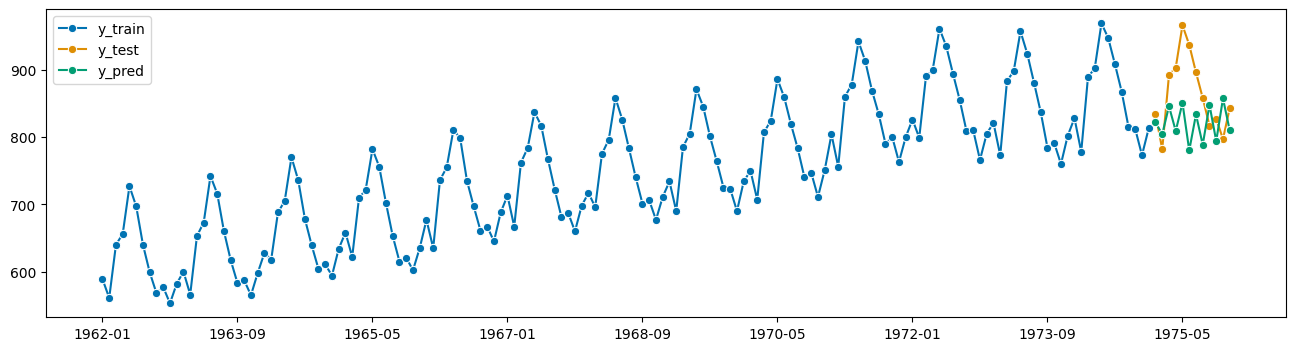

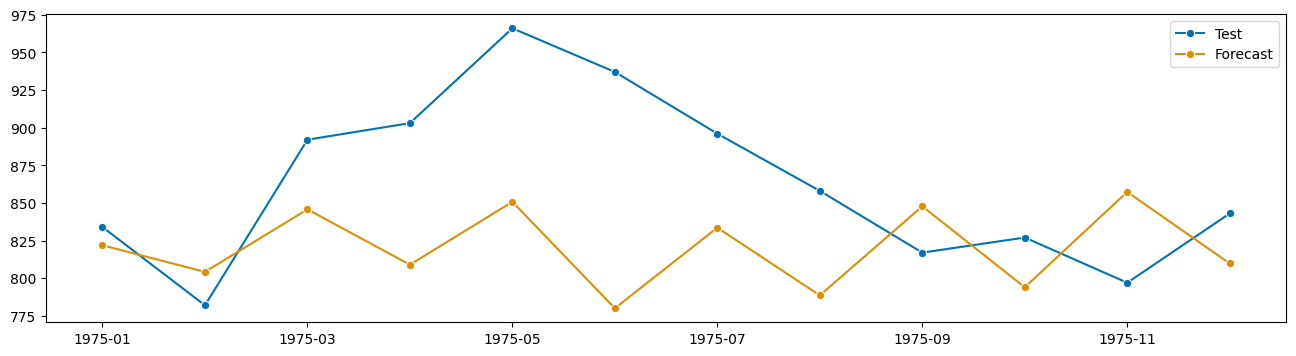

In [14]:
"""### **Composite Grid Search C**V"""

forecaster.get_params()

forecaster = make_reduction(regressor, window_length=10, strategy="recursive")
param_grid = {"window_length": [7, 10, 12, 15],
              'estimator__max_features':[3,4,6,7]}
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.9), window_length=20)
gscv = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=param_grid)

gscv.fit(y_train)

print(gscv.best_params_)
print(gscv.best_score_)

print(rmse(y_test, y_pred))

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

plot_series(y_test,y_pred , labels=['Test','Forecast'])
plt.show()

## Rossmann Data

In [34]:
train = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/cases/Rossmann Store Sales/train.csv", index_col=2)
test = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/cases/Rossmann Store Sales/test.csv", index_col=2)
train

/tmp/ipykernel_227225/1229003540.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/cases/Rossmann Store Sales/train.csv", index_col=2)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1


In [35]:
test_1 = test[test['Store']==1]
store_1 = train[train['Store']==1]['Sales']
store_1

Date
2015-07-31    5263
2015-07-30    5020
2015-07-29    4782
2015-07-28    5011
2015-07-27    6102
              ... 
2013-01-05    4997
2013-01-04    4486
2013-01-03    4327
2013-01-02    5530
2013-01-01       0
Name: Sales, Length: 942, dtype: int64

In [36]:
idx = pd.to_datetime(train.index, format="%Y-%m-%d").to_period("D")
train.index = idx

In [39]:
store_1.head()

Date
2015-07-31    5263
2015-07-30    5020
2015-07-29    4782
2015-07-28    5011
2015-07-27    6102
Name: Sales, dtype: int64

In [43]:
store_1 = store_1.sort_index()
store_1.head(4)

Date
2013-01-01       0
2013-01-02    5530
2013-01-03    4327
2013-01-04    4486
Name: Sales, dtype: int64

In [45]:
y = store_1
y_train, y_test = temporal_train_test_split(df,test_size=48)
